In [36]:
# Importación módulos
import sys
import numpy as np
np.set_printoptions(threshold=10000)
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
ruta =  '../imgpack/Monobanda/2_Corsica.jpg' # Consideramos que la imagen es monobanda
image = cv.imread(ruta,cv.IMREAD_GRAYSCALE) #Transformamos nuestra imagen a escala de grises

In [38]:
# Función amplia
def amplia(img):
    R=2
    fila,colum = img.shape
    resimg = np.zeros((fila*R,colum*R), dtype=int)
    f2,c2 = resimg.shape
    #Paso I
    for x in range(fila):
        for y in range(colum):
            resimg[x*R,y*R] = img[x,y]
    print(f"Paso I \n {resimg} \n")
    
    #Paso II
    
    for x in range(0,c2,R): # Por cada columna de la imagen ampliada
        #print(resimg[:,x])
        for y in range(1,f2-1,R): # Por cada valor intermedio de la imagen ampliada
            #print(resimg[y,x])
            arriba = resimg[y-1,x]
            abajo = resimg[y+1,x]
            #resimg[y,x] = round((arriba + abajo) / R)
            resimg[y,x] = int((arriba + abajo)/2)
    print(f"Paso II \n {resimg} \n")
    
    
    # Paso III
    for x in range(0,f2): # Recorrido filas
        #print(resimg[x])
        for y in range(1,c2-2,R):
            #print(resimg[x,y])
            izq = resimg[x,y-1]
            der = resimg[x,y+1]
            #resimg[x,y] = round((izq+der)/2)
            resimg[x,y] = int((izq+der)/2)
    print(f"Paso III \n {resimg} \n")

    #Paso IV
    resimg[:,c2-1] = resimg[:,c2-2]
    print(f"Paso IV \n {resimg} \n")
    
    # Paso V
    resimg[f2-1] = resimg[f2-2]
    print(f"Paso V \n {resimg} \n")
    
    return resimg
    

In [39]:
img = np.array([
        [12,17,32],
        [26,17,40],
        [14,20,27],
    ])

amplia(img)

Paso I 
 [[12  0 17  0 32  0]
 [ 0  0  0  0  0  0]
 [26  0 17  0 40  0]
 [ 0  0  0  0  0  0]
 [14  0 20  0 27  0]
 [ 0  0  0  0  0  0]] 

Paso II 
 [[12  0 17  0 32  0]
 [19  0 17  0 36  0]
 [26  0 17  0 40  0]
 [20  0 18  0 33  0]
 [14  0 20  0 27  0]
 [ 0  0  0  0  0  0]] 

Paso III 
 [[12 14 17 24 32  0]
 [19 18 17 26 36  0]
 [26 21 17 28 40  0]
 [20 19 18 25 33  0]
 [14 17 20 23 27  0]
 [ 0  0  0  0  0  0]] 

Paso IV 
 [[12 14 17 24 32 32]
 [19 18 17 26 36 36]
 [26 21 17 28 40 40]
 [20 19 18 25 33 33]
 [14 17 20 23 27 27]
 [ 0  0  0  0  0  0]] 

Paso V 
 [[12 14 17 24 32 32]
 [19 18 17 26 36 36]
 [26 21 17 28 40 40]
 [20 19 18 25 33 33]
 [14 17 20 23 27 27]
 [14 17 20 23 27 27]] 



array([[12, 14, 17, 24, 32, 32],
       [19, 18, 17, 26, 36, 36],
       [26, 21, 17, 28, 40, 40],
       [20, 19, 18, 25, 33, 33],
       [14, 17, 20, 23, 27, 27],
       [14, 17, 20, 23, 27, 27]])

In [40]:
# Función diezmado
def diezmado(img,R):
    fila,colum = img.shape
    resimg = np.zeros((round(fila*R),round(colum*R)), dtype=int)
    n = round(fila / round(fila * R))
    for x in range(0,resimg.shape[0]):
        for y in range(0,resimg.shape[1]):
            resimg[x,y] = img[x*n,y*n]
            
    return resimg

In [41]:
img_exp = diezmado(image,0.25)
img_exp2 = amplia(img_exp)

Paso I 
 [[ 25   0  26 ...   0  12   0]
 [  0   0   0 ...   0   0   0]
 [ 26   0  26 ...   0  13   0]
 ...
 [  0   0   0 ...   0   0   0]
 [ 66   0  77 ...   0 160   0]
 [  0   0   0 ...   0   0   0]] 

Paso II 
 [[ 25   0  26 ...   0  12   0]
 [ 25   0  26 ...   0  12   0]
 [ 26   0  26 ...   0  13   0]
 ...
 [ 74   0  84 ...   0 135   0]
 [ 66   0  77 ...   0 160   0]
 [  0   0   0 ...   0   0   0]] 

Paso III 
 [[ 25  25  26 ...  13  12   0]
 [ 25  25  26 ...  13  12   0]
 [ 26  26  26 ...  14  13   0]
 ...
 [ 74  79  84 ... 136 135   0]
 [ 66  71  77 ... 146 160   0]
 [  0   0   0 ...   0   0   0]] 

Paso IV 
 [[ 25  25  26 ...  13  12  12]
 [ 25  25  26 ...  13  12  12]
 [ 26  26  26 ...  14  13  13]
 ...
 [ 74  79  84 ... 136 135 135]
 [ 66  71  77 ... 146 160 160]
 [  0   0   0 ...   0   0   0]] 

Paso V 
 [[ 25  25  26 ...  13  12  12]
 [ 25  25  26 ...  13  12  12]
 [ 26  26  26 ...  14  13  13]
 ...
 [ 74  79  84 ... 136 135 135]
 [ 66  71  77 ... 146 160 160]
 [ 66  71  77 .

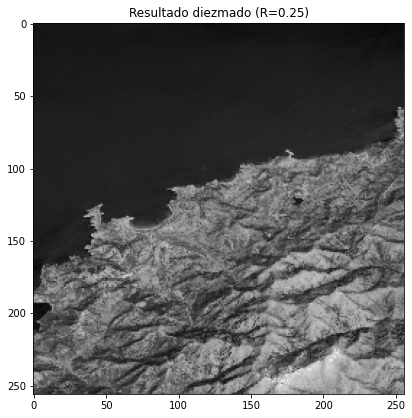

In [42]:
fig = plt.figure(figsize=(15, 15)) # Creamos nueva figura

fig.add_subplot(221)
plt.title('Resultado diezmado (R=0.25)')
plt.imshow(img_exp,cmap='gray')
plt.show()

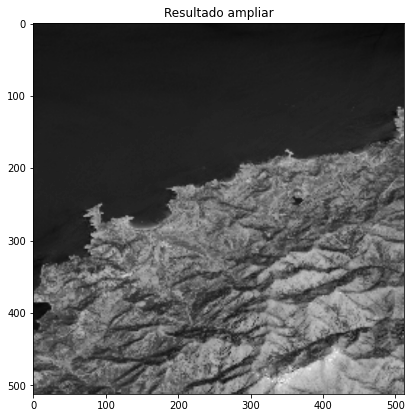

In [43]:
fig = plt.figure(figsize=(15, 15)) # Creamos nueva figura

fig.add_subplot(221)
plt.title('Resultado ampliar')
plt.imshow(img_exp2,cmap='gray')
plt.show()

Paso I 
 [[197   0 197 ...   0 243   0]
 [  0   0   0 ...   0   0   0]
 [196   0 196 ...   0 245   0]
 ...
 [  0   0   0 ...   0   0   0]
 [200   0 208 ...   0 216   0]
 [  0   0   0 ...   0   0   0]] 

Paso II 
 [[197   0 197 ...   0 243   0]
 [196   0 196 ...   0 244   0]
 [196   0 196 ...   0 245   0]
 ...
 [203   0 208 ...   0 214   0]
 [200   0 208 ...   0 216   0]
 [  0   0   0 ...   0   0   0]] 

Paso III 
 [[197 197 197 ... 243 243   0]
 [196 196 196 ... 244 244   0]
 [196 196 196 ... 245 245   0]
 ...
 [203 205 208 ... 216 214   0]
 [200 204 208 ... 220 216   0]
 [  0   0   0 ...   0   0   0]] 

Paso IV 
 [[197 197 197 ... 243 243 243]
 [196 196 196 ... 244 244 244]
 [196 196 196 ... 245 245 245]
 ...
 [203 205 208 ... 216 214 214]
 [200 204 208 ... 220 216 216]
 [  0   0   0 ...   0   0   0]] 

Paso V 
 [[197 197 197 ... 243 243 243]
 [196 196 196 ... 244 244 244]
 [196 196 196 ... 245 245 245]
 ...
 [203 205 208 ... 216 214 214]
 [200 204 208 ... 220 216 216]
 [200 204 208 .

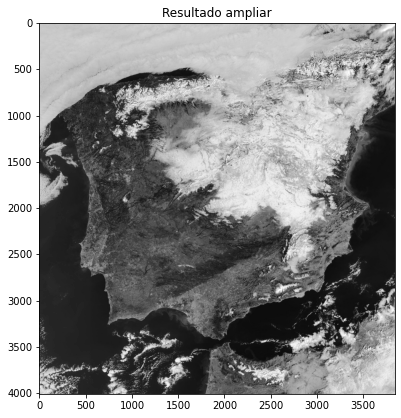

In [44]:
ruta2 = "../imgpack/Filomena.jpg"
img30 = cv.imread(ruta2,cv.IMREAD_GRAYSCALE)
img_exp23 = amplia(img30)
fig = plt.figure(figsize=(15, 15)) # Creamos nueva figura

fig.add_subplot(221)
plt.title('Resultado ampliar')
plt.imshow(img_exp23,cmap='gray')
plt.show()